

#                            Project: Investigate a Dataset of Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> At this report we are choose to work on movies data spanning for a years from IMDB Movies company, which represent each movie and all the informations that related to it. 
>  <br /> After looking for this data we are wondering what is the factors that may affect increasing the budget? and which year was the most flourishing year for releasing a movies?

In [89]:
import pandas as pd
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [90]:
df = pd.read_csv('movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [91]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning 

In [93]:
df.nunique() 

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

> at the privious cell we checked for duplicate id values

In [83]:
df['id'].drop_duplicates(inplace=True)

> at the privious cell we deals with duplicate id values

In [96]:
df['imdb_id'].dropna(inplace=True)

> at the privious cell we deal with the problem of missing data  

In [97]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = pd.to_datetime(df['release_year'])
df['release_year'] = df['release_year'].dt.year

> at the previous cell we fixed incorrect data types

In [98]:
df.loc[ df.budget == 0, "budget" ] = df['budget'].mean()
df.loc[ df.runtime == 0, "runtime" ] = df['runtime'].mean()
df.loc[ df.revenue == 0, "revenue" ] = df['revenue'].mean()

> at the previous cell we fixed incorrect data types

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null float64
revenue                 10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null float64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj 

> at the previous cell we checked our data after the cleaning steps

<a id='eda'></a>
## Exploratory Data Analysis


### which year was the most flourishing year for releasing the movies?

In [94]:
sc.stats.mode(df['release_year'])

ModeResult(mode=array([2014]), count=array([700]))

Text(0,0.5,'count')

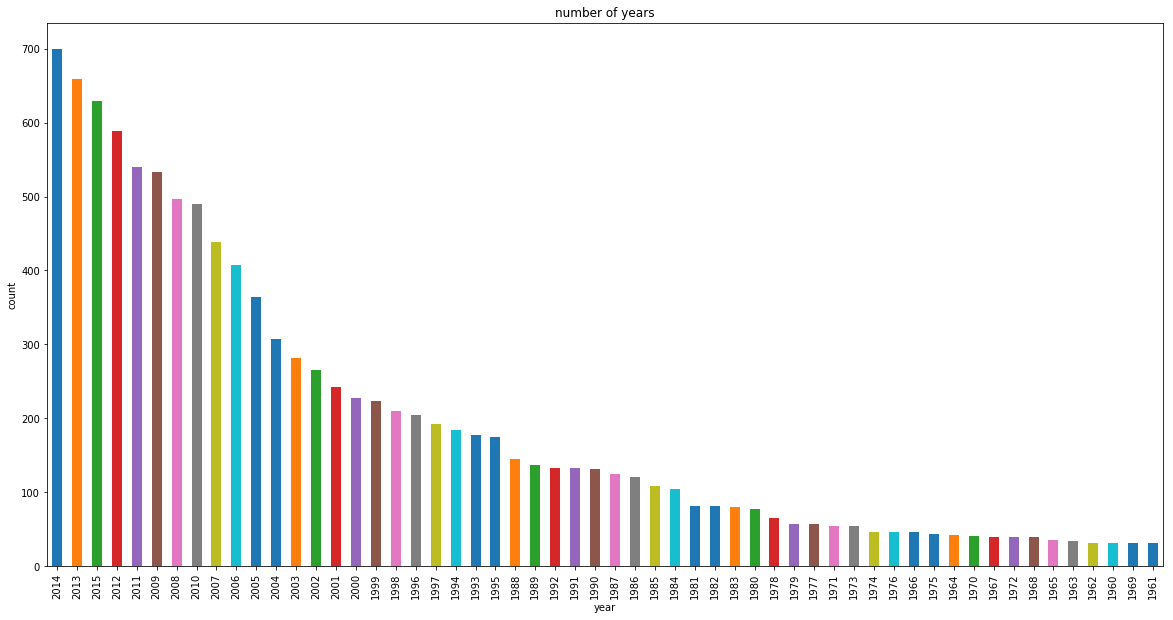

In [95]:
plt.figure(figsize=(20,10))
df['release_year'].value_counts().plot(kind='bar');
plt.title('number of years')
plt.xlabel('year')
plt.ylabel('count')

##### As we observe by our calculation the most year for producing movies was 2014

### Is there a relation between the runtime of the movie and the budget? What is it?

Text(0,0.5,'runtime')

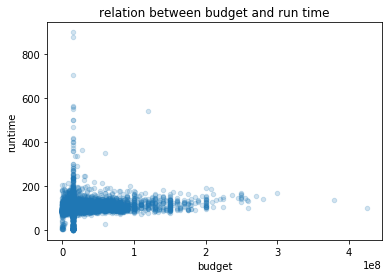

In [104]:
df.plot(x='budget', y='runtime', kind='scatter' , alpha='0.2')
plt.title('relation between budget and run time')
plt.xlabel('budget')
plt.ylabel('runtime')


##### as we observe from the graph there is no relation between the budget and the run time

Text(0,0.5,'vote average')

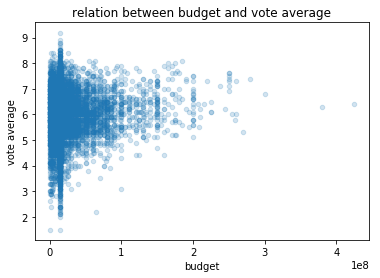

In [105]:
df.plot(x='budget', y='vote_average', kind='scatter', alpha='0.2')
plt.title('relation between budget and vote average')
plt.xlabel('budget')
plt.ylabel('vote average')


##### as we observe from the graph there is no relation between the budget and the vote average

Text(0,0.5,'vote count')

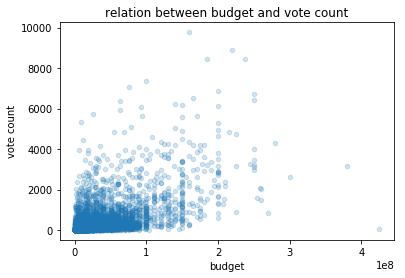

In [106]:
df.plot(x='budget', y='vote_count', kind='scatter', alpha='0.2')
plt.title('relation between budget and vote count')
plt.xlabel('budget')
plt.ylabel('vote count')

##### as we observe from the graph there is no relation between the budget and the vote count

<a id='conclusions'></a>
## Conclusions

 >  by analysis our data and make the observation we conclude that there is no relation between runtime and budget, vote average and budget or vote count and budget.
 <br /> There may be some other factors that affect the increasing on the budget but the data is not sufficnt to figure out these others factors, also although that is good population there may be because of the zeros value that was in the budget casue our analysis to be inaccurate. 
<br />Also the data was too sufficient and represent a wide number of years to see that 2014 was the most flourishing year for releasing movies which make it the best year to have varity of choices for movies.


In [3]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0